In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import configparser
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [ ]:
df=pd.read_csv("rafaelnadal_tweets.csv")
df

user_name       user_location  \
0       Nong Nhat Minh                 NaN   
1          Peter Ndoro              Africa   
2       Gurpreet Singh               Mansa   
3     💯 Earning Tips💰💰   Dhaka, Bangladesh   
4                  ahs            universe   
...                ...                 ...   
8281        myKhel.com           Bengaluru   
8282           Deepu☀️    Karnataka, India   
8283     Leslie Geddes                 NaN   
8284     Leslie Geddes                 NaN   
8285       Pragativadi  Bhubaneswar, India   

                                       user_description  user_followers  \
0                                                   NaN              20   
1     Broadcast Journalist | This is not a News Feed...          279853   
2                               https://t.co/2zAmCdu2Jh              61   
3                                            ARKERARMY💪             115   
4                                         a common man.              35   
...                                                 ...             ...   
8281  The sports channel of @Oneindia. A one-stop pl...           10882   
8282  Mechanical Engineer ⚙️| Football ⚽| F1🏎️| Tenn...              11   
8283                                                NaN              16   
8284                                                NaN              16   
8285  The only unbiased Odia Daily, Founded by Shri ...           22314   

                  date                                               text  \
0     08-06-2022 17:02  @DappCensus Nice project. @linhair8 @LongAirdr...   
1     08-06-2022 16:52  The champions are being born everyday. They ar...   
2     08-06-2022 16:43  @DappCensus 🤩\n Successful in 2022\nBig profit...   
3     08-06-2022 16:39  @DappCensus This is very huge and great projec...   
4     08-06-2022 16:35  @neeteshb @RajKumarMUFC @87vintage @nadalprop ...   
...                ...                                                ...   
8281   31-05-2022 3:52  Who'll win the big battle beyond the baseline ...   
8282   31-05-2022 2:48  Blockbuster QF so excited\n#VamosRafa #RafaelN...   
8283   31-05-2022 2:21  @RafaelNadal Vamos Rafa! Gracias for all the j...   
8284   31-05-2022 2:18  @toisports @RafaelNadal @DjokerNole @rolandgar...   
8285   31-05-2022 1:53  Rafael Nadal's French Open Quarter-Final With ...   

                                               hashtags  retweetCount  
0     ['dappcensus', 'Airdrop', 'BNB', 'giveaway', '...           637  
1                                                   NaN           302  
2                                                   NaN             0  
3                                                   NaN         23781  
4                                          ['Djokovic']         13067  
...                                                 ...           ...  
8281  ['FrenchOpen', 'RolandGarros', 'RafaelNadal𓃵',...         10646  
8282  ['VamosRafa', 'RafaelNadal𓃵', 'DjokovicNadal',...           945  
8283                                                NaN           162  
8284                                                NaN         25902  
8285                     ['latestnews', 'RafaelNadal𓃵']          3704  

[8286 rows x 8 columns]

In [ ]:
df.shape

(8286, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         8286 non-null   object
 1   user_location     5853 non-null   object
 2   user_description  7405 non-null   object
 3   user_followers    8286 non-null   int64 
 4   date              8286 non-null   object
 5   text              8286 non-null   object
 6   hashtags          6586 non-null   object
 7   retweetCount      8286 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 518.0+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'],format="%d-%m-%Y %H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         8286 non-null   object        
 1   user_location     5853 non-null   object        
 2   user_description  7405 non-null   object        
 3   user_followers    8286 non-null   int64         
 4   date              8286 non-null   datetime64[ns]
 5   text              8286 non-null   object        
 6   hashtags          6586 non-null   object        
 7   retweetCount      8286 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 518.0+ KB


In [ ]:
df.describe()

user_followers   retweetCount
count    8.286000e+03    8286.000000
mean     1.016901e+04    5927.665339
std      2.445845e+05    8069.822615
min      0.000000e+00       0.000000
25%      6.600000e+01     205.000000
50%      2.535000e+02    1750.000000
75%      1.061500e+03   10614.000000
max      1.444403e+07  100500.000000

In [ ]:
pd.DatetimeIndex(df['date']).month.unique()

Int64Index([6, 5], dtype='int64', name='date')

In [ ]:
df['month'] = df['date'].dt.month
df.head()

user_name      user_location  \
0    Nong Nhat Minh                NaN   
1       Peter Ndoro             Africa   
2    Gurpreet Singh              Mansa   
3  💯 Earning Tips💰💰  Dhaka, Bangladesh   
4               ahs           universe   

                                    user_description  user_followers  \
0                                                NaN              20   
1  Broadcast Journalist | This is not a News Feed...          279853   
2                            https://t.co/2zAmCdu2Jh              61   
3                                         ARKERARMY💪             115   
4                                      a common man.              35   

                 date                                               text  \
0 2022-06-08 17:02:00  @DappCensus Nice project. @linhair8 @LongAirdr...   
1 2022-06-08 16:52:00  The champions are being born everyday. They ar...   
2 2022-06-08 16:43:00  @DappCensus 🤩\n Successful in 2022\nBig profit...   
3 2022-06-08 16:39:00  @DappCensus This is very huge and great projec...   
4 2022-06-08 16:35:00  @neeteshb @RajKumarMUFC @87vintage @nadalprop ...   

                                            hashtags  retweetCount  month  
0  ['dappcensus', 'Airdrop', 'BNB', 'giveaway', '...           637      6  
1                                                NaN           302      6  
2                                                NaN             0      6  
3                                                NaN         23781      6  
4                                       ['Djokovic']         13067      6

In [ ]:
df.month.value_counts()
june = len(df[df.month==6])
may = len(df[df.month==5])
month_dict = {'May' : may, "June" : june}
month_dict


{'May': 1209, 'June': 7077}

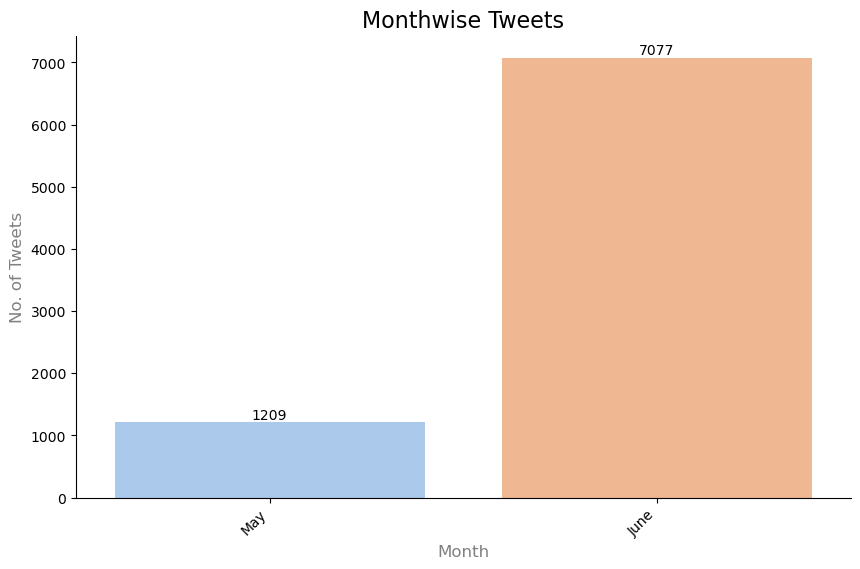

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with month counts
df_month_counts = df.month.value_counts()
month_dict = {'May': df_month_counts[5], 'June': df_month_counts[6]}

# Set the custom color palette
colors = sns.color_palette('pastel')

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(month_dict.keys()), y=list(month_dict.values()), palette=colors)

# Set the axis labels and title
plt.xlabel('Month', fontsize=12, color='gray')
plt.ylabel('No. of Tweets', fontsize=12, color='gray')
plt.title('Monthwise Tweets', fontsize=16, color='black')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for i, (month, count) in enumerate(month_dict.items()):
    plt.text(i, count + 0.4, str(count), ha='center', va='bottom', fontsize=10, color='black')

# Hide the spines and ticks
sns.despine()

# Show the plot
plt.show()


In [ ]:
# Percent increase = [(new value - original value)/original value] × 100
percent_increase_in_june = (month_dict['June'] - month_dict['May'])/month_dict['May'] * 100
percent_increase_in_june

485.35980148883374

In [ ]:
df_june = df[df.month==6]
df_june['day'] = df_june['date'].dt.day
df_june.day.value_counts()

C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2318348538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_june['day'] = df_june['date'].dt.day


5    3928
3    1404
6     559
1     520
7     257
8     179
4     159
2      71
Name: day, dtype: int64

In [ ]:
df_may = df[df.month==5]
df_may['day'] = df_may['date'].dt.day
df_may.day.value_counts()

C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2013222761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['day'] = df_may['date'].dt.day


31    1209
Name: day, dtype: int64

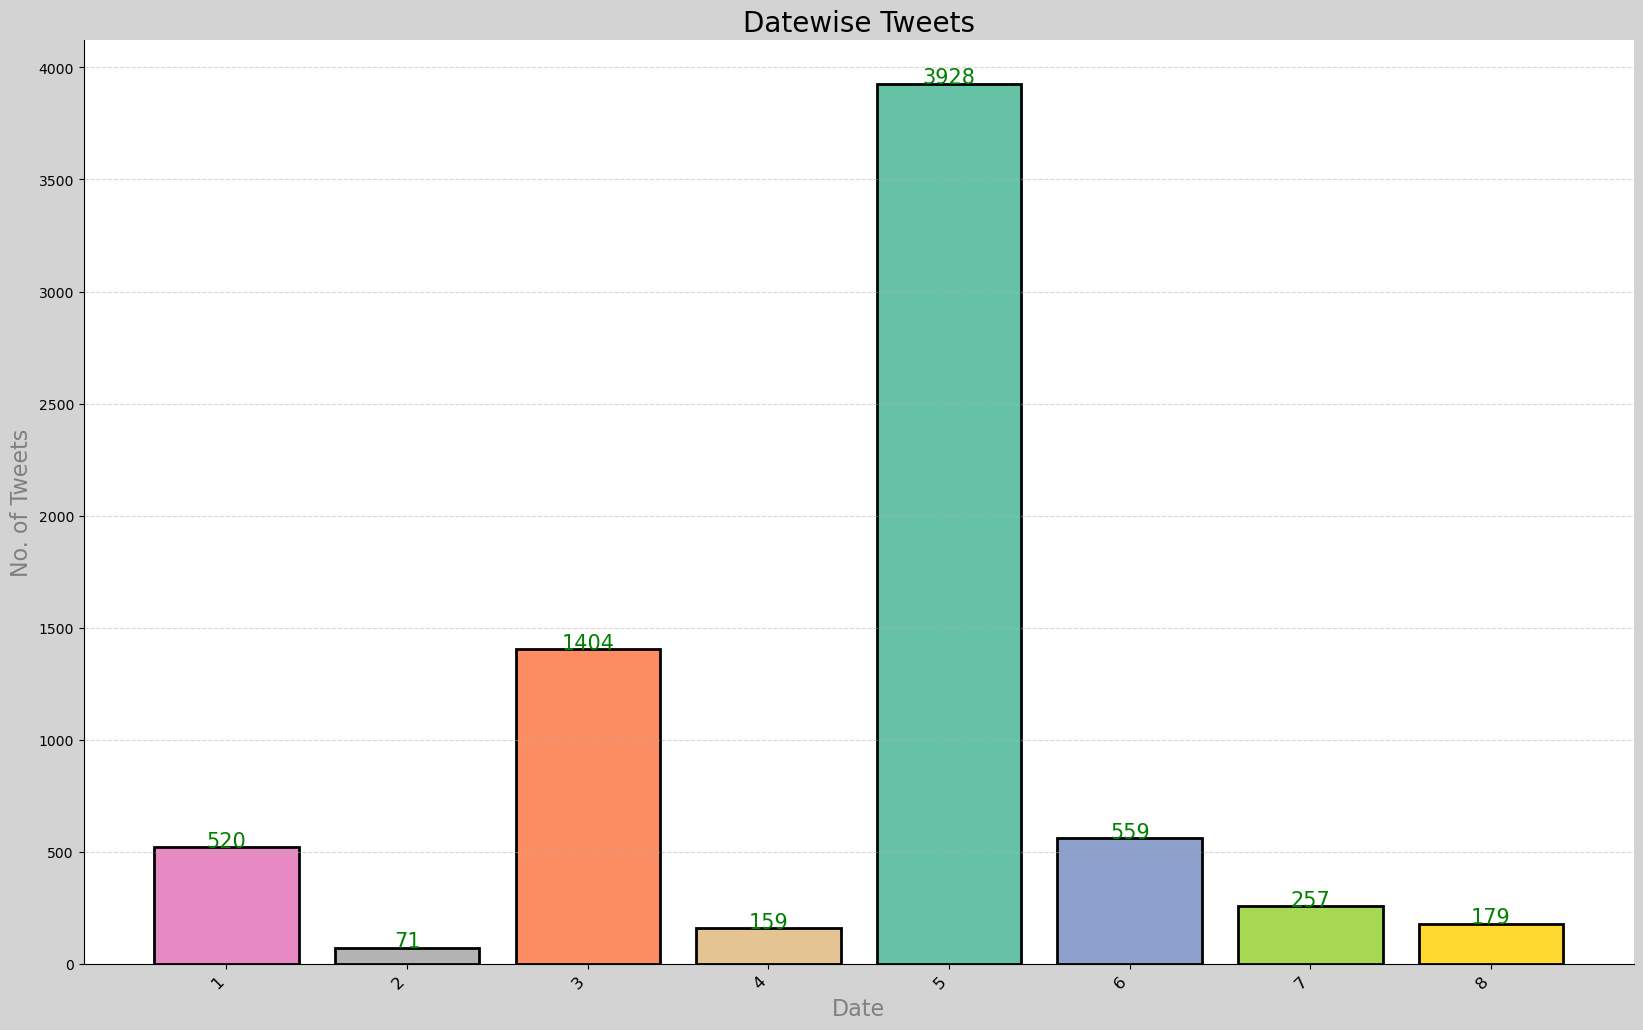

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the custom color palette
colors = sns.color_palette('Set2')

# Create the plot with a larger figure size
plt.figure(figsize=(20, 12),facecolor='lightgray')

# Plot the bar chart with modified bar appearance
df_june_counts = df_june['day'].value_counts()
plt.bar(df_june_counts.index, df_june_counts.values, color=colors, edgecolor='black', linewidth=2)

# Set the axis labels and title
plt.xlabel('Date', fontsize=16, color='gray')
plt.ylabel('No. of Tweets', fontsize=16, color='gray')
plt.title('Datewise Tweets', fontsize=20, color='black')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add data labels to the bars
for i, v in enumerate(df_june_counts.values):
    plt.text(df_june_counts.index[i], v + 0.15, str(v), fontsize=15, color='green', ha='center')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Hide the spines
sns.despine()

# Show the plot
plt.show()


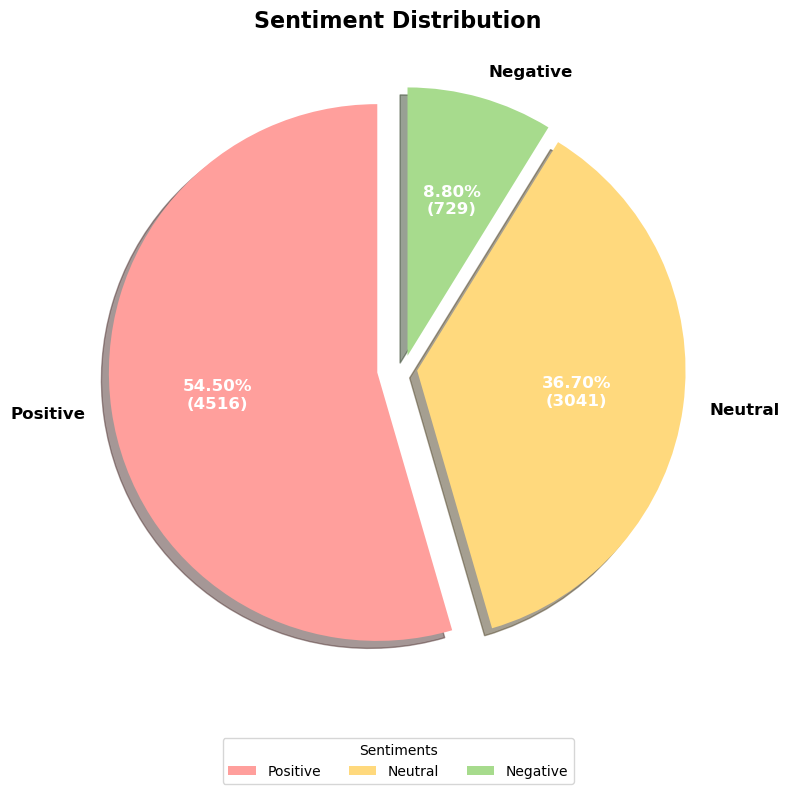

In [ ]:
import matplotlib.pyplot as plt

def Clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    return text

df['text'] = df['text'].apply(Clean_text)

def getsentiments(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['text'].apply(getsentiments)

def getanalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df['sentiment'] = df['polarity'].apply(getanalysis)

def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df['sentiment'].value_counts()
total = len(df['sentiment'])

# Set custom colors for the pie slices
colors = ['#FF9F9C', '#FFD97D', '#A7DB8D']

# Set explode for the slices (optional)
explode = (0.1, 0.05, 0.05)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(v_counts, labels=v_counts.index, autopct=my_fmt,
                                  shadow=True, startangle=90, colors=colors, explode=explode)

# Customize the font sizes and colors
plt.setp(texts, size=12, weight='bold', color='black')
plt.setp(autotexts, size=12, weight='bold', color='white')

# Add a legend
ax.legend(wedges, v_counts.index, title='Sentiments', loc='center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Set the title
ax.set_title('Sentiment Distribution', fontsize=16, weight='bold')

# Equal aspect ratio ensures a circular pie chart
ax.axis('equal')

# Remove the extra whitespace around the plot
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df.head()

user_name      user_location  \
0    Nong Nhat Minh                NaN   
1       Peter Ndoro             Africa   
2    Gurpreet Singh              Mansa   
3  💯 Earning Tips💰💰  Dhaka, Bangladesh   
4               ahs           universe   

                                    user_description  user_followers  \
0                                                NaN              20   
1  Broadcast Journalist | This is not a News Feed...          279853   
2                            https://t.co/2zAmCdu2Jh              61   
3                                         ARKERARMY💪             115   
4                                      a common man.              35   

                 date                                               text  \
0 2022-06-08 17:02:00   Nice project.    \ndappcensus Airdrop BNB giv...   
1 2022-06-08 16:52:00  The champions are being born everyday. They ar...   
2 2022-06-08 16:43:00   🤩\n Successful in 2022\nBig profitable\n \n _...   
3 2022-06-08 16:39:00   This is very huge and great project and team ...   
4 2022-06-08 16:35:00      With 50% GS on his surface 2 GS per year D...   

                                   hashtags  retweetCount  month  polarity  \
0  dappcensus,Airdrop,BNB,giveaway,Ethereum           637      6     0.600   
1                                                     302      6    -0.200   
2                                                       0      6     0.375   
3                                                   23781      6     0.664   
4                                  Djokovic         13067      6     0.600   

  sentiment  
0  Positive  
1  Negative  
2  Positive  
3  Positive  
4  Positive

[Text(0.5, 0, 'user_followers'),
 Text(1.5, 0, 'retweetCount'),
 Text(2.5, 0, 'month'),
 Text(3.5, 0, 'polarity')]

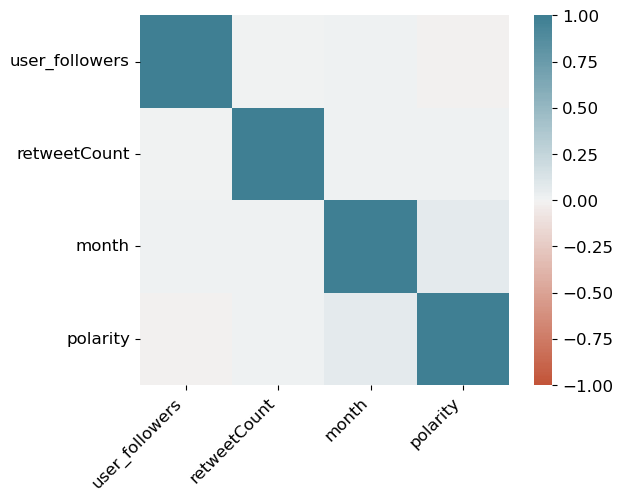

In [ ]:
# Testing the correlation

correlationA = df.corr(method = 'pearson')
correlationA

ax = sns.heatmap(
    correlationA,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n = 200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

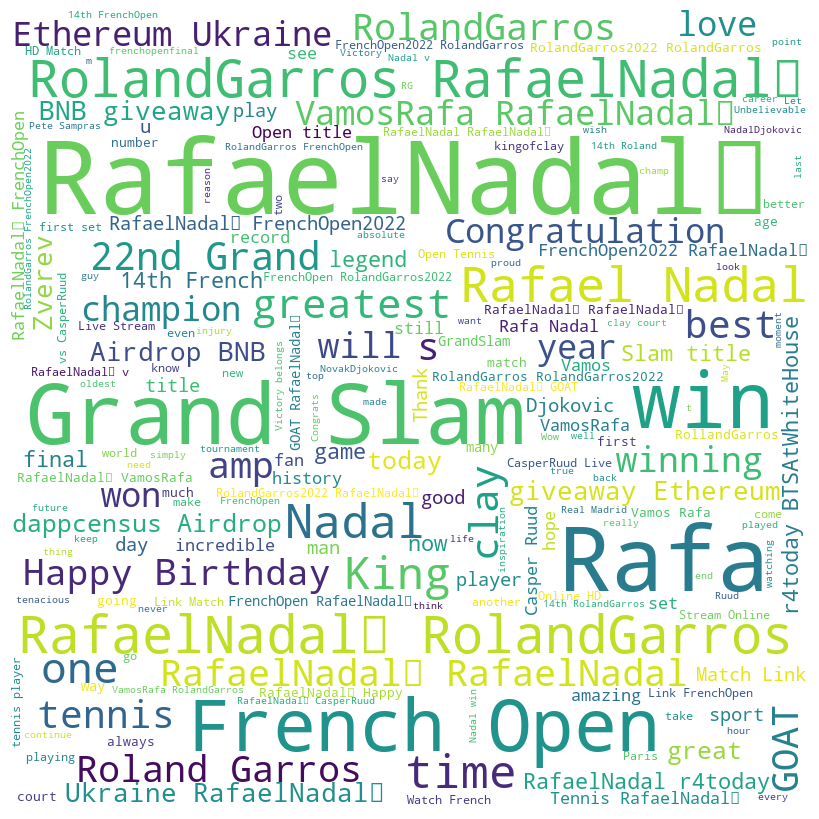

In [ ]:
df_positive = df[df.sentiment=="Positive"]
words = ' '.join([text for text in df_positive['text']])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

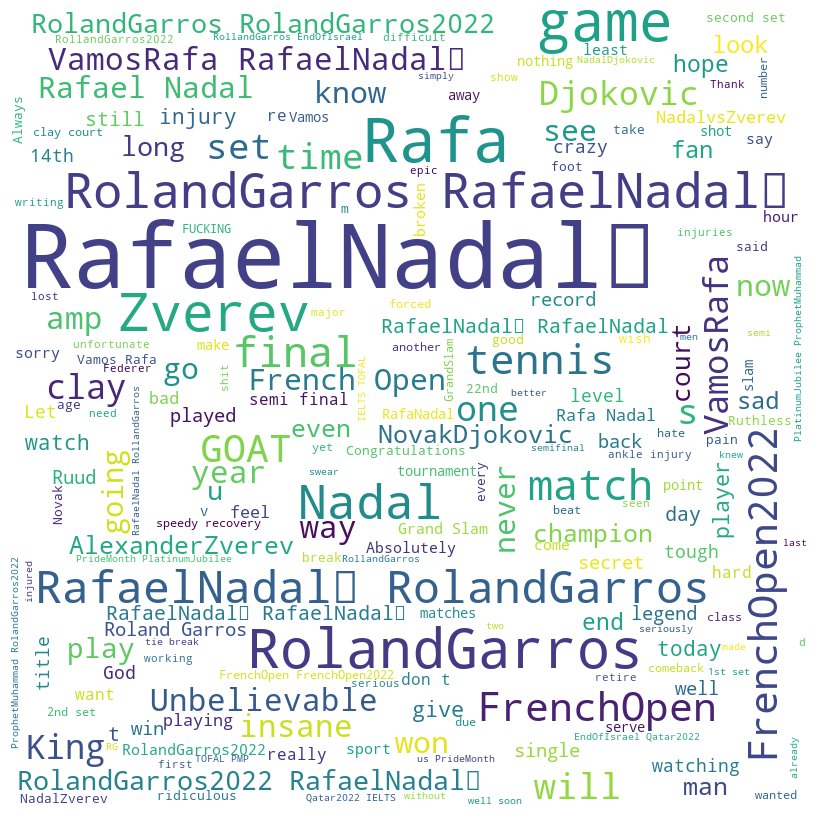

In [ ]:
df_positive = df[df.sentiment=="Negative"]
words = ' '.join([text for text in df_positive['text']])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

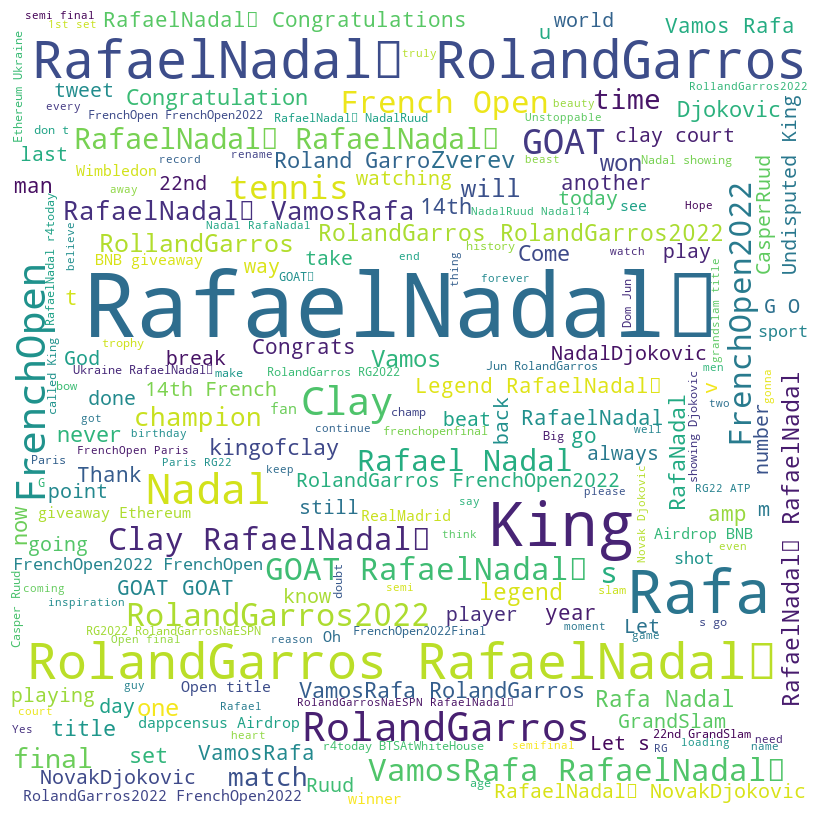

In [ ]:
df_positive = df[df.sentiment=="Neutral"]
words = ' '.join([text for text in df_positive['text']])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df_top5 = df.sort_values(by='retweetCount', ascending=False)[df.shape[0]-5:][::-1][['text', 'retweetCount']]
df_top5


text  retweetCount
4143  Unreal from Rafa, although the reality was he ...             0
6854                           Morning 🫡\nRafaelNadal𓃵              0
2239       Just another day at the office! RafaelNadal𓃵             0
6864                     👑 Never enough. RafaelNadal𓃵               0
2212  Rafael Nadal Won French Open\nRollandGarros Ra...             0

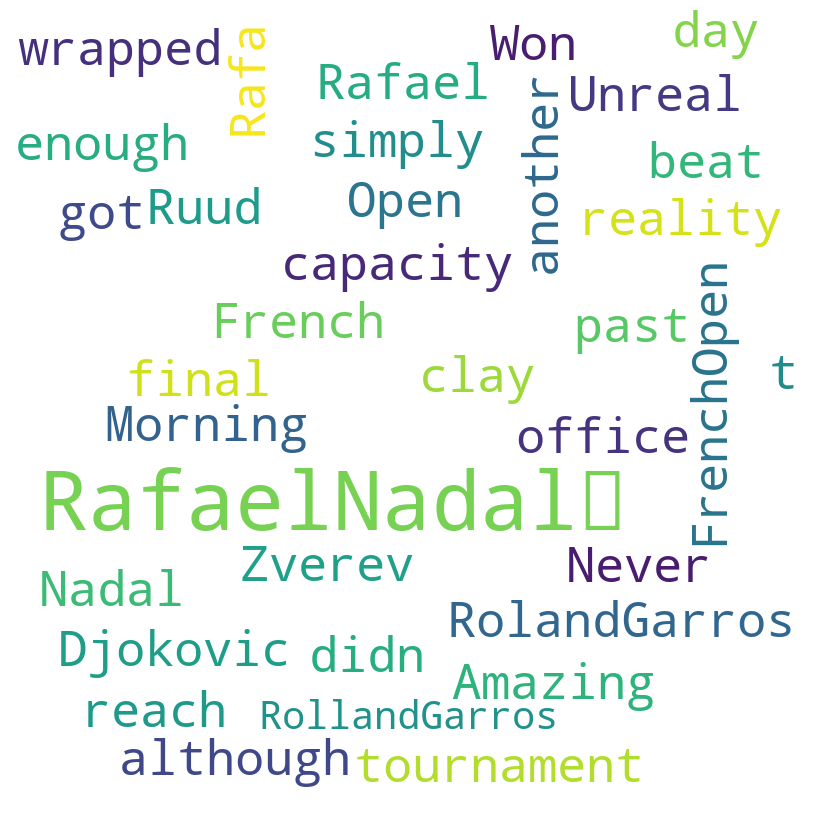

In [ ]:
words = ' '.join([text for text in df_top5['text']])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df_influential_people = df[df.user_followers > 1000][['user_name','user_followers']]
df_influential_people.shape

(2131, 2)

In [ ]:
df_influential_people

user_name  user_followers
1                   Peter Ndoro          279853
5                  TroubleFault            5982
18                      AlexCam            3147
22    🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana            1431
24                      ᗩY ᗰ ᗩᑎ            1109
...                         ...             ...
8236                Marlina Ayu            2400
8243            Sadaf Sayeed 🇮🇳            2701
8246                        Ola            1310
8259             Sohaib Farrukh            1256
8273                        J.J            2152

[1175 rows x 2 columns]

In [ ]:
df_influential_people = df_influential_people.drop_duplicates(subset=['user_name'])
df_influential_people.shape

(1175, 2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by user_followers in descending order and select the top 10 rows
top_10_followers = df[['user_name', 'user_followers']].nlargest(10, 'user_followers')

top_10_followers


user_name  user_followers
6427    The Times Of India        14444026
5167    The Times Of India        14444000
2900      Zee News English         5609845
1498       Shoaib Malik 🇵🇰         3406021
3181  All India Radio News         3012929
2977              ABP LIVE         1997612
5203              ABP LIVE         1997612
710         Kerala Tourism         1976400
657           Moneycontrol         1292637
6426            TOI Sports         1062565

C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\3255760272.py:18: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  plt.tight_layout()
C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\3255760272.py:18: UserWarning: Glyph 127472 (\N{REGIONAL INDICATOR SYMBOL LETTER K}) missing from current font.
  plt.tight_layout()
C:\Users\Nivi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nivi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127472 (\N{REGIONAL INDICATOR SYMBOL LETTER K}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


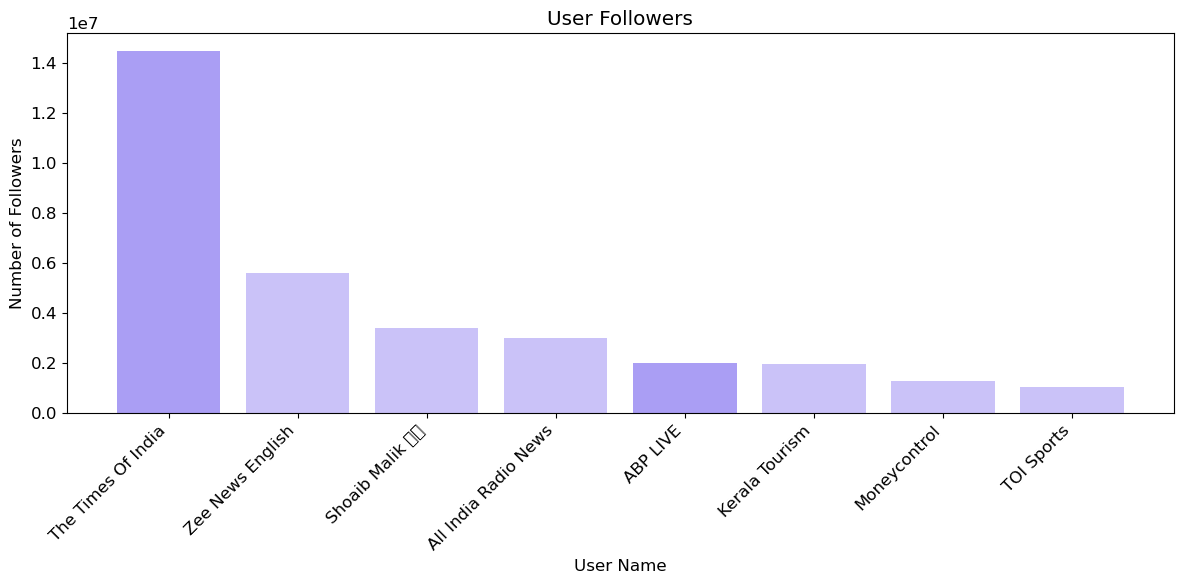

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'user_name' and 'user_followers' columns

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_followers['user_name'], top_10_followers['user_followers'], color='mediumslateblue',alpha=0.4)

# Set the axis labels and title
plt.xlabel('User Name')
plt.ylabel('Number of Followers')
plt.title('User Followers')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df.user_location.value_counts()

India                            298
New Delhi, India                 113
Mumbai, India                    109
Mumbai                            92
barcaelona                        78
                                ... 
Warsaw, Poland Olsztyn,Poland      1
Antigua, Guatemala                 1
इंदौर, भारत                        1
فوق السطح 😂                        1
Buffalo, NY                        1
Name: user_location, Length: 2109, dtype: int64

In [ ]:
def get_country(location):
    try:
        if location is not None:
            if ',' in location:
                location = location.split(',')[-1]
                location = location.strip()
        if 'Mumbai' in location:
            location = 'India'
        elif location == 'United Kingdom':
            location = 'England'
        elif location == 'barcaelona':
            location = 'Spain'
        elif location == 'NY' or location == 'CA':
            location = 'USA'
        return location
    except Exception as e:
        return location

In [ ]:
df_tweet_location = df.user_location.apply(get_country)
df_tweet_location.value_counts()[:7]

India           1462
USA              242
England          213
Spain             89
South Africa      80
Pakistan          73
Canada            62
Name: user_location, dtype: int64

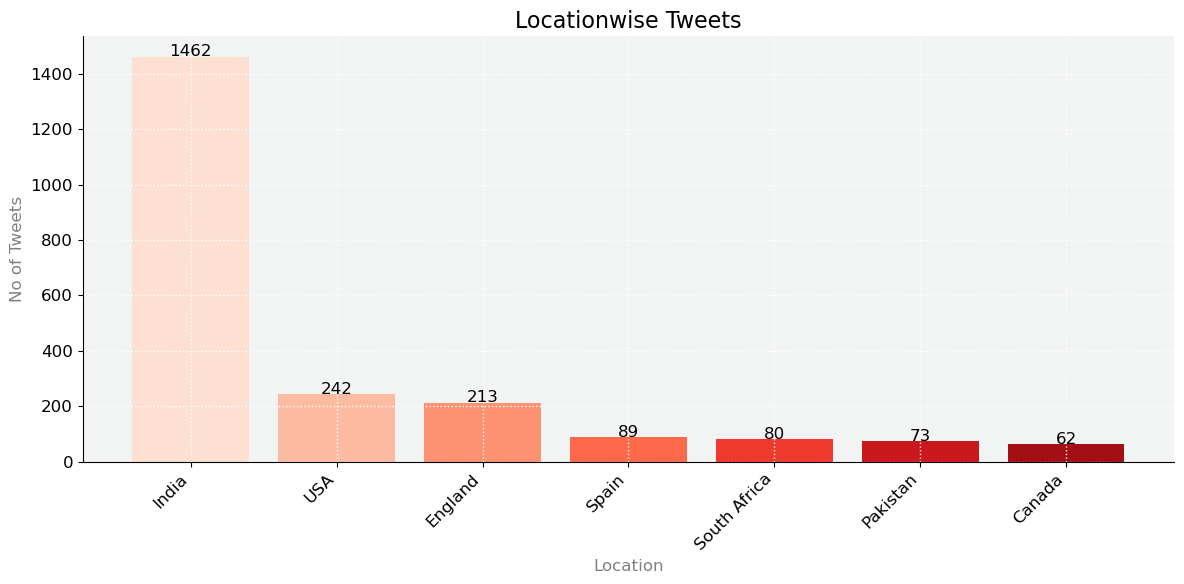

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette with gradient colors
colors = sns.color_palette('Reds', n_colors=7)

# Create a figure with a decorative background pattern
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#F2F4F4')
ax.grid(color='white', linestyle=':', linewidth=1)

# Create the bar plot with custom colors
plt.bar(df_tweet_location.value_counts().index[:7], df_tweet_location.value_counts().values[:7], color=colors)

# Set the axis labels and title with a stylish font
plt.xlabel('Location', fontsize=12, color='gray')
plt.ylabel('No of Tweets', fontsize=12, color='gray')
plt.title('Locationwise Tweets', fontsize=16, color='black')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for i, v in enumerate(df_tweet_location.value_counts()[:7]):
    plt.text(df_tweet_location.index[i], v + 0.4, str(round(v, 2)), fontsize=12, color='black', ha='center')

# Remove the spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
def get_hashtags(hashtag_list):
    try:
        if hashtag_list is not None:
            hashtag_list = hashtag_list.split(',')
            for i in range(len(hashtag_list)):
                hashtag_list[i] = hashtag_list[i].replace('[','')
                hashtag_list[i] = hashtag_list[i].replace(']','')
                hashtag_list[i] = hashtag_list[i].replace("'",'')
                hashtag_list[i] = hashtag_list[i].replace("'",'')
                hashtag_list[i] = hashtag_list[i].replace("𓃵",'')
                hashtag_list[i] = hashtag_list[i].strip()
        text_join = ','.join(hashtag_list)
        return text_join
    except Exception as e:
        return ''

In [ ]:
df['hashtags'] = df['hashtags'].apply(get_hashtags)
df['hashtags']

0                dappcensus,Airdrop,BNB,giveaway,Ethereum
1                                                        
2                                                        
3                                                        
4                                                Djokovic
                              ...                        
8281    FrenchOpen,RolandGarros,RafaelNadal,NovakDjoko...
8282    VamosRafa,RafaelNadal,DjokovicNadal,NovakDjokovic
8283                                                     
8284                                                     
8285                               latestnews,RafaelNadal
Name: hashtags, Length: 8286, dtype: object

In [ ]:
df1=pd.DataFrame()
df1['hashtags'] = df['hashtags'].str.split(',')
#df1['hashtags'] = df1['hashtags'].fillna('')
df1.head()


hashtags
0  [dappcensus, Airdrop, BNB, giveaway, Ethereum]
1                                              []
2                                              []
3                                              []
4                                      [Djokovic]

In [ ]:
df2 = pd.DataFrame(df1['hashtags'].tolist()).add_prefix('hashtags_')
df2

hashtags_0    hashtags_1     hashtags_2     hashtags_3 hashtags_4  \
0     dappcensus       Airdrop            BNB       giveaway   Ethereum   
1                         None           None           None       None   
2                         None           None           None       None   
3                         None           None           None       None   
4       Djokovic          None           None           None       None   
...          ...           ...            ...            ...        ...   
8281  FrenchOpen  RolandGarros    RafaelNadal  NovakDjokovic     Tennis   
8282   VamosRafa   RafaelNadal  DjokovicNadal  NovakDjokovic       None   
8283                      None           None           None       None   
8284                      None           None           None       None   
8285  latestnews   RafaelNadal           None           None       None   

     hashtags_5 hashtags_6 hashtags_7 hashtags_8 hashtags_9 hashtags_10  
0          None       None       None       None       None        None  
1          None       None       None       None       None        None  
2          None       None       None       None       None        None  
3          None       None       None       None       None        None  
4          None       None       None       None       None        None  
...         ...        ...        ...        ...        ...         ...  
8281        ATP       None       None       None       None        None  
8282       None       None       None       None       None        None  
8283       None       None       None       None       None        None  
8284       None       None       None       None       None        None  
8285       None       None       None       None       None        None  

[8286 rows x 11 columns]

In [ ]:
df2.isnull().sum()

hashtags_0        0
hashtags_1     4074
hashtags_2     6299
hashtags_3     7419
hashtags_4     7879
hashtags_5     8072
hashtags_6     8196
hashtags_7     8236
hashtags_8     8258
hashtags_9     8279
hashtags_10    8285
dtype: int64

In [ ]:
df3 = pd.Series(df2.values.ravel('F'))
df3.shape

(91146,)

In [ ]:
df3.isnull().sum()

74997

In [ ]:
df3 = df3.dropna()
df3.shape

(16149,)

In [ ]:
df3

0        dappcensus
1                  
2                  
3                  
4          Djokovic
            ...    
79163     VamosRafa
79195     VamosRafa
79229     VamosRafa
81577    alterpinay
86288          RG22
Length: 16149, dtype: object

In [ ]:
a = df3.value_counts()
a = a.drop(a.index[2])
a

RafaelNadal                  6129
RolandGarros                 2236
FrenchOpen                    541
VamosRafa                     508
FrenchOpen2022                427
                             ... 
rafa22                          1
MillionDollarsWorstofGame       1
TennisAfterDark                 1
nfts                            1
alterpinay                      1
Length: 968, dtype: int64

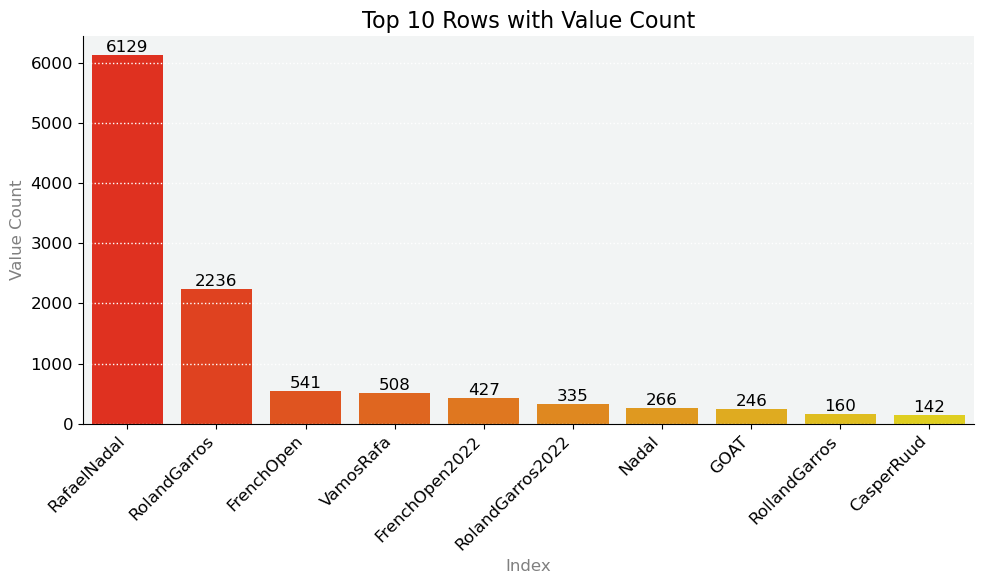

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a Series named 'series' with index and values

# Sort the Series in descending order
sorted_series = a.sort_values(ascending=False)

# Get the top 10 rows
top_10 = sorted_series.head(10)

# Create a custom color palette with gradient colors
colors = sns.color_palette('autumn', n_colors=10)

# Create a figure with a decorative background pattern
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#F2F4F4')
ax.grid(color='white', linestyle=':', linewidth=1)

# Create the bar plot with custom colors and count labels
sns.barplot(x=top_10.index, y=top_10.values, palette=colors)

# Set the axis labels and title with a stylish font
plt.xlabel('Index', fontsize=12, color='gray')
plt.ylabel('Value Count', fontsize=12, color='gray')
plt.title('Top 10 Rows with Value Count', fontsize=16, color='black')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add count labels to the bars
for i, v in enumerate(top_10.values):
    plt.text(i, v + 50, str(v), fontsize=12, color='black', ha='center')

# Remove the spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


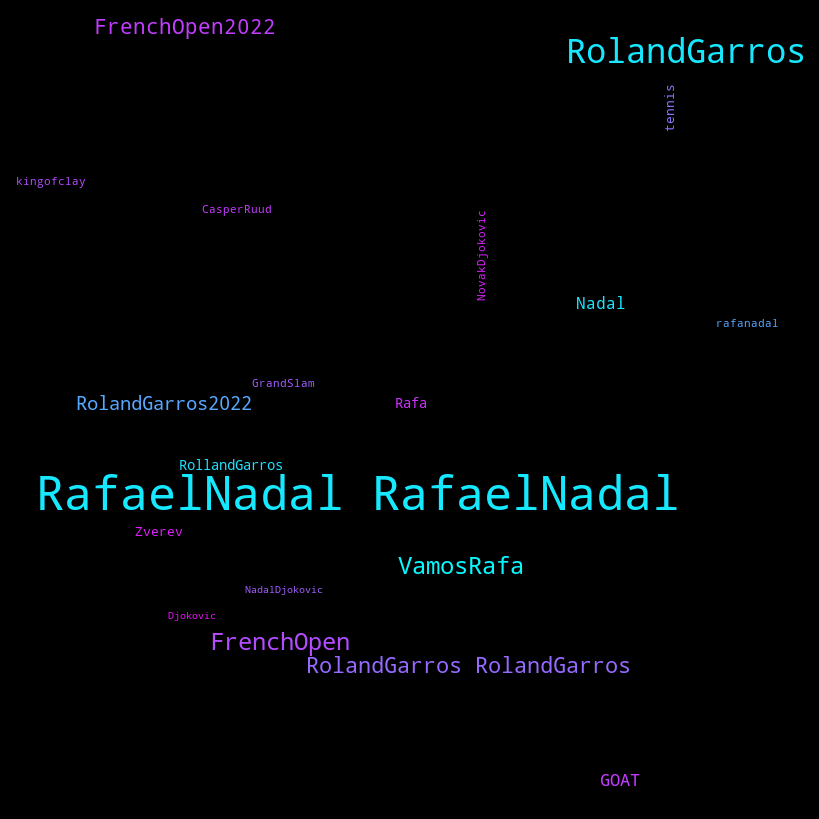

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df3' with a single column

# Concatenate the values from the column into a single text
text = ' '.join(df3.str.strip().str.replace(" ", "_"))

# Create a word cloud
wordcloud = WordCloud(width=800, height=800, stopwords=stopwords, background_color="black", colormap="cool", min_font_size=10, random_state=42).generate(text)

# Create a figure with a custom background color
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black')

# Display the word cloud with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Adjust the figure layout
plt.tight_layout(pad=0)

# Show the plot
plt.show()


In [ ]:
val = df['user_name'].value_counts().sort_values(ascending=False).head(10)
val


🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana    78
X Games 2023 Live            72
Ruth😊☕🇺🇦                     47
Deepali NO DMs 🚫             46
Mowafak Alkawass (Mo)        42
Vineet Nair                  32
La Marquesita                31
Vishal 🕉                     30
Tareq                        30
Z Tromp                      29
Name: user_name, dtype: int64

C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2824252873.py:30: UserWarning: Glyph 127988 (\N{WAVING BLACK FLAG}) missing from current font.
  plt.tight_layout()
C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2824252873.py:30: UserWarning: Glyph 917607 (\N{TAG LATIN SMALL LETTER G}) missing from current font.
  plt.tight_layout()
C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2824252873.py:30: UserWarning: Glyph 917602 (\N{TAG LATIN SMALL LETTER B}) missing from current font.
  plt.tight_layout()
C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2824252873.py:30: UserWarning: Glyph 917619 (\N{TAG LATIN SMALL LETTER S}) missing from current font.
  plt.tight_layout()
C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2824252873.py:30: UserWarning: Glyph 917603 (\N{TAG LATIN SMALL LETTER C}) missing from current font.
  plt.tight_layout()
C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2824252873.py:30: UserWarning: Glyph 917620 (\N{TAG LATIN SMALL LETTER T}) missing from current fo

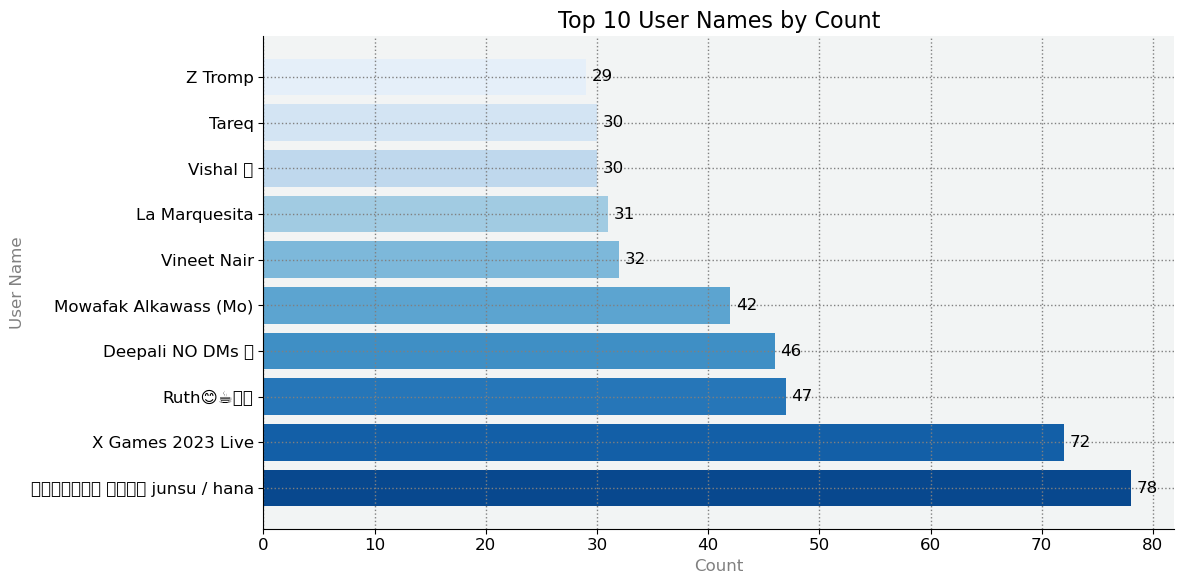

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

val = df['user_name'].value_counts().sort_values(ascending=False).head(10)

# Create a custom color palette with gradient colors
colors = sns.color_palette('Blues_r', n_colors=10)

# Create a figure with a decorative background pattern
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#F2F4F4')
ax.grid(color='grey', linestyle=':', linewidth=1)

# Create the horizontal bar plot with custom colors
plt.barh(val.index, val.values, color=colors)

# Set the axis labels and title with a stylish font
plt.xlabel('Count', fontsize=12, color='gray')
plt.ylabel('User Name', fontsize=12, color='gray')
plt.title('Top 10 User Names by Count', fontsize=16, color='black')

# Add count labels to the bars
for i, v in enumerate(val.values):
    plt.text(v + 0.5, i, str(v), fontsize=12, color='black', va='center')

# Remove the spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


# ANALYSIS ON A SINGLE USER

In [ ]:
df_user = df[df.user_name=='🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana']
df_user.head()

user_name user_location  \
22   🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana    barcaelona   
73   🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana    barcaelona   
117  🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana    barcaelona   
374  🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana    barcaelona   
375  🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana    barcaelona   

                                      user_description  user_followers  \
22   JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...            1431   
73   JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...            1431   
117  JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...            1431   
374  JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...            1431   
375  JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...            1431   

                   date                                               text  \
22  2022-06-08 14:46:00  Lmfao last time someone accused rafa nadal of ...   
73  2022-06-08 12:06:00  HAHAHHAHA DJOKOVIC FANS BEING SO PISSY AND EMB...   
117 2022-06-08 08:39:00  And the haters will still talk shit because th...   
374 2022-06-07 12:48:00  Man they are still crying 🤣😭 RafaNadal RafaelN...   
375 2022-06-07 12:43:00  Karma is getting you all good after all that t...   

                  hashtags  retweetCount  month  polarity sentiment  
22             RafaelNadal          1041      6  0.000000   Neutral  
73                                  5210      6  0.566667  Positive  
117              RafaNadal          3866      6 -0.200000  Negative  
374  RafaNadal,RafaelNadal          4914      6 -0.200000  Negative  
375            RafaelNadal          9264      6  0.700000  Positive

In [ ]:
df_user['user_description'][22]


'JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal @serenawilliams #FUCKSM , @warriors @f1 @celtic , Anime'

In [ ]:
df_user['date'].dt.date.value_counts().sort_index()

2022-05-31     1
2022-06-01     1
2022-06-02     1
2022-06-03    19
2022-06-05    49
2022-06-06     2
2022-06-07     2
2022-06-08     3
Name: date, dtype: int64

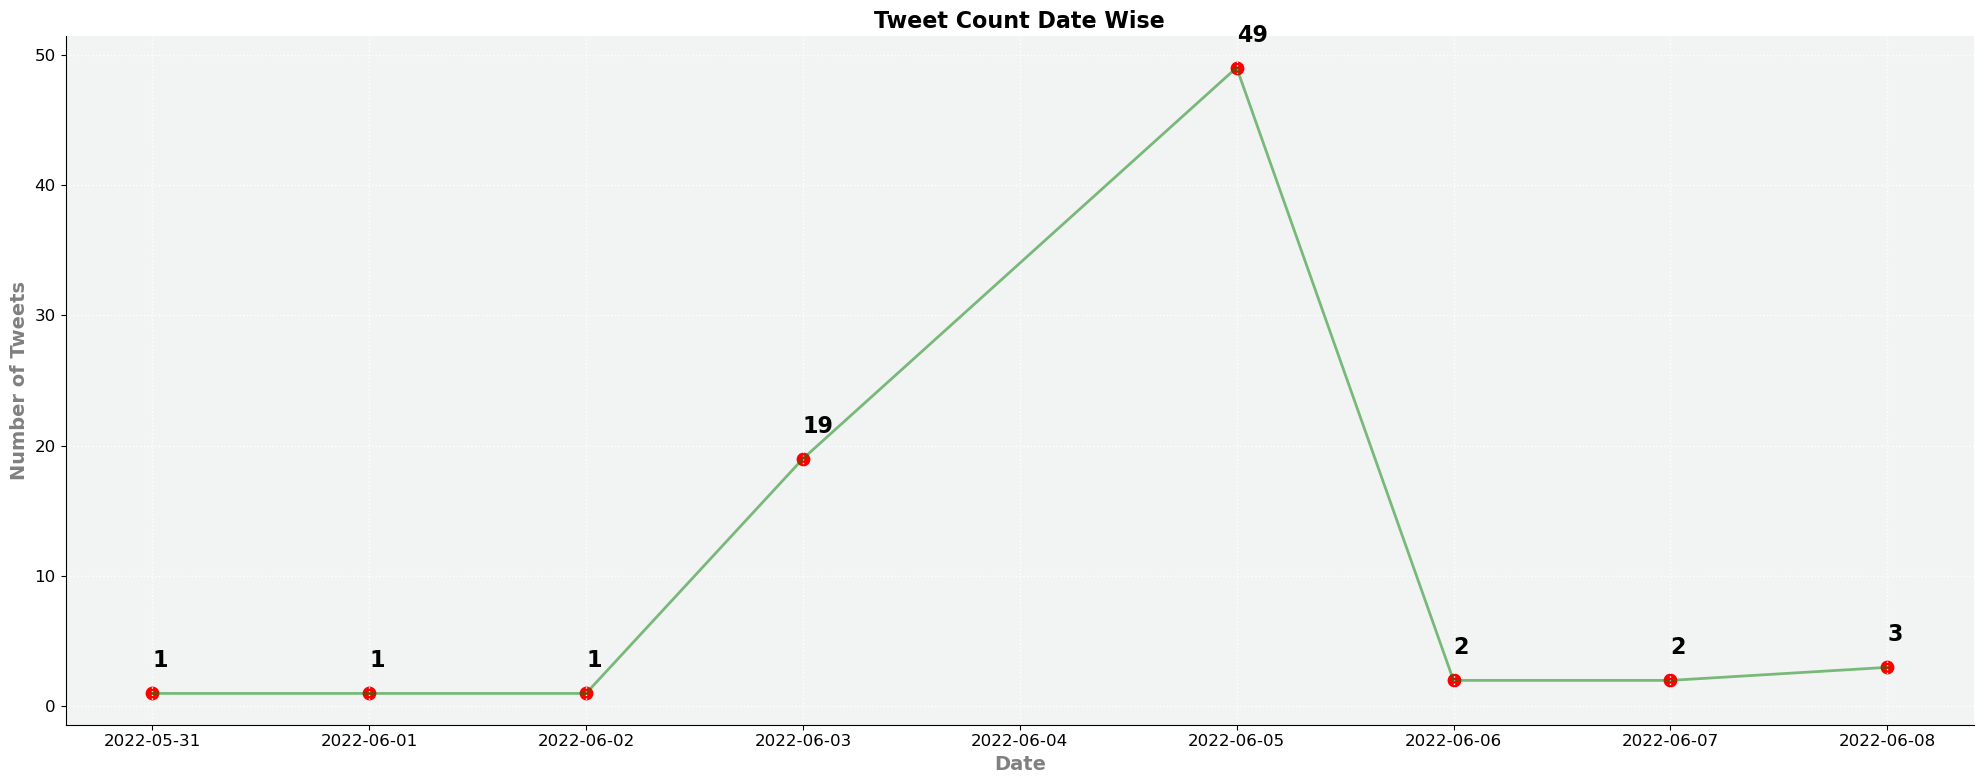

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
plt.plot(df_user['date'].dt.date.value_counts().sort_index().index, df_user['date'].dt.date.value_counts().sort_index().values, color="green", linewidth=2,alpha=0.5)

# Set the axis labels and title with a stylish font
plt.xlabel('Date', fontsize=14, color='gray', fontweight='bold')
plt.ylabel('Number of Tweets', fontsize=14, color='gray', fontweight='bold')
plt.title('Tweet Count Date Wise', fontsize=16, color='black', fontweight='bold')

# Customize the background with a decorative pattern
plt.gca().set_facecolor('#F2F4F4')
plt.grid(color='white', linestyle=':', linewidth=1)

# Add data labels to the points with bolder font and higher vertical position
for x, y in zip(df_user['date'].dt.date.value_counts().sort_index().index, df_user['date'].dt.date.value_counts().sort_index().values):
    y = round(int(y), 2)
    plt.text(x, y + 2, str(y), ha='left', color='black', fontsize=16, fontweight='bold')

# Make the plot points bolder
plt.scatter(df_user['date'].dt.date.value_counts().sort_index().index, df_user['date'].dt.date.value_counts().sort_index().values, color='red', s=80)

# Remove the spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df_retweets = df_user['retweetCount'][::-1]
df_retweets

7127        4
6641    14305
6488       42
6213     3551
6112     2098
        ...  
375      9264
374      4914
117      3866
73       5210
22       1041
Name: retweetCount, Length: 78, dtype: int64

In [ ]:
df_retweets.set_axis(range(1, len(df_retweets) + 1), inplace=True)
df_retweets.head()

1        4
2    14305
3       42
4     3551
5     2098
Name: retweetCount, dtype: int64

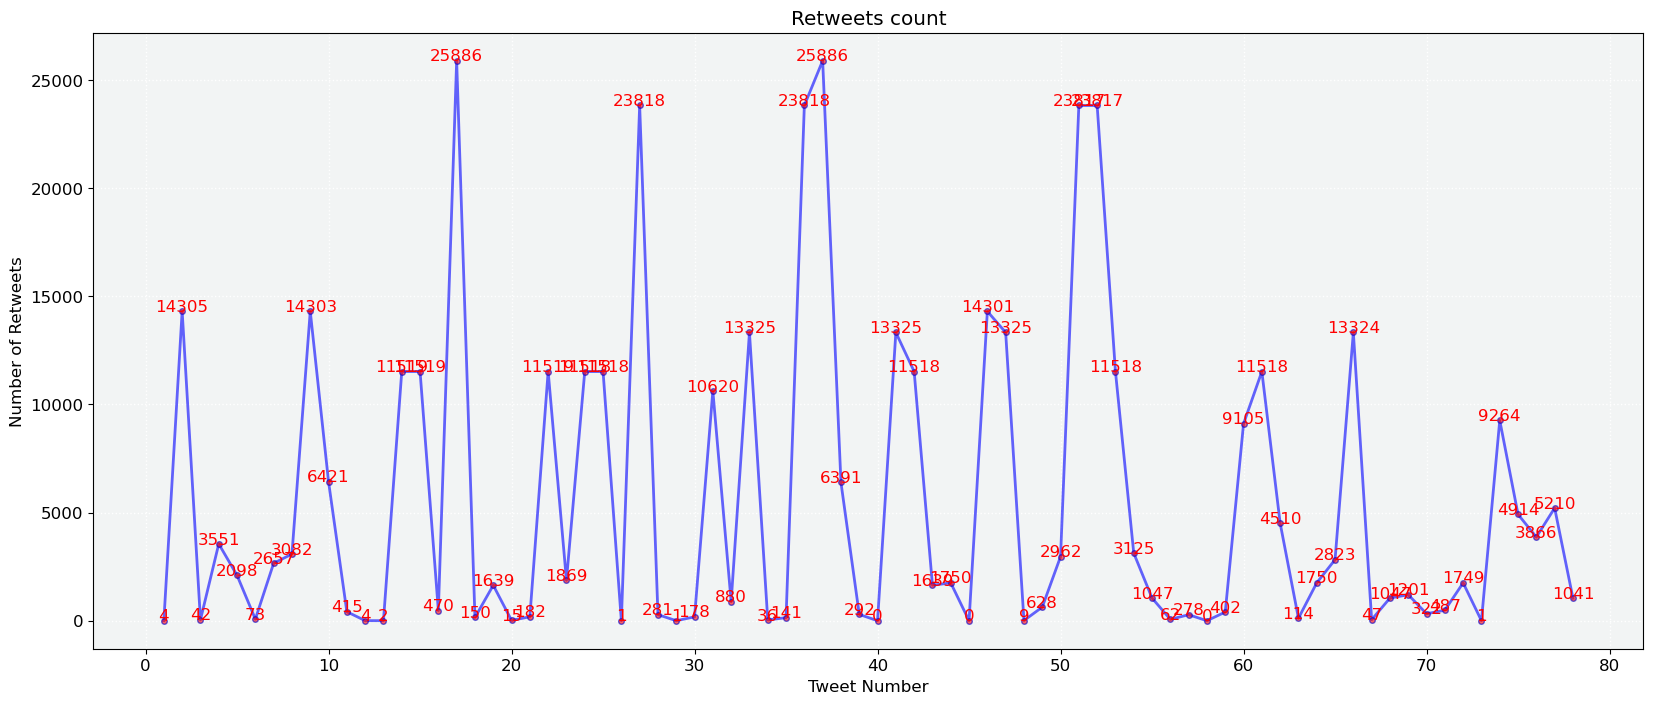

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_retweets.index, df_retweets.values, color="blue",alpha=0.6, linewidth=2, marker='o', markersize=4, markerfacecolor='red', markeredgecolor='mediumblue')


plt.xlabel('Tweet Number')
plt.ylabel('Number of Retweets')
plt.title('Retweets count')

# Customize the background with a light gray color
plt.gca().set_facecolor('#F2F4F4')
plt.grid(color='white', linestyle=':', linewidth=1)

for x, y in zip(df_retweets.index, df_retweets.values):
    y= round(int(y),2)
    plt.text(x, y+0.1, str(y), ha='center',color='red',fontsize=12)

In [ ]:
count = 0
for i in df_retweets:
    if i > 1000:
        count+=1
print(count)

47


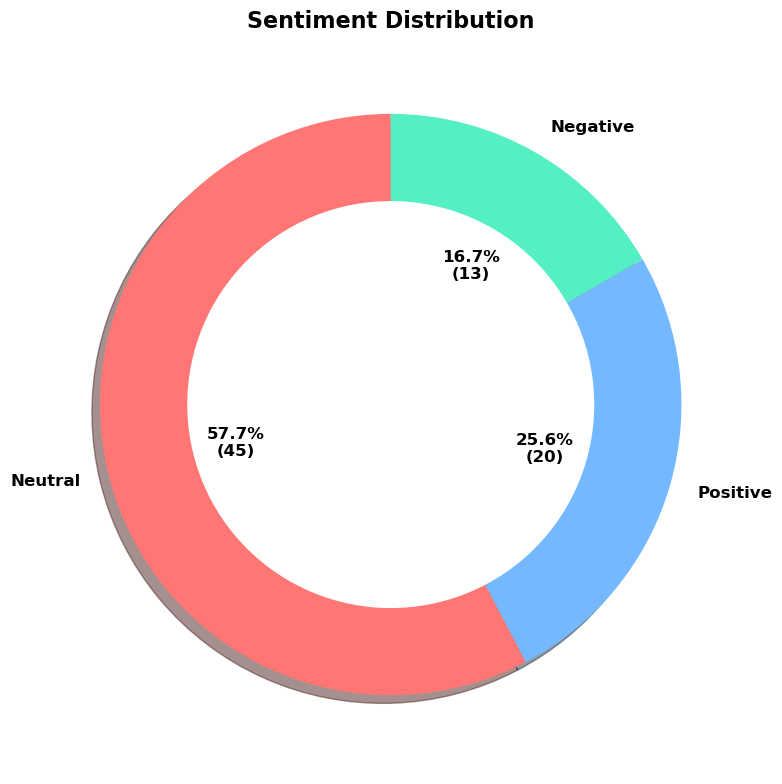

In [ ]:
import matplotlib.pyplot as plt

# Define a custom color palette with gradient colors
colors = ['#ff7675', '#74b9ff', '#55efc4']

# Define a custom function to format the autopct labels
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df_user['sentiment'].value_counts()
total = len(df_user['sentiment'])

# Create a figure with a larger size and white background
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Create a pie chart with custom colors, labels, and autopct formatting
wedges, _, autotexts = plt.pie(v_counts, labels=v_counts.index, colors=colors, autopct=my_fmt, shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})

# Set the properties of the autopct labels
for autotext in autotexts:
    autotext.set_color('white')

# Add a circle at the center of the pie chart to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Add the numbers inside the pie chart slices
for wedge, autotext in zip(wedges, autotexts):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x = 0.55 * wedge.r * np.cos(np.deg2rad(angle))
    y = 0.55 * wedge.r * np.sin(np.deg2rad(angle))
    plt.text(x, y, autotext.get_text(), ha='center', va='center', fontsize=12, fontweight='bold')

# Set the aspect ratio to make the pie chart a perfect circle
plt.axis('equal')

# Add a title with a stylish font
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


# SENTIMENT ANALYSIS

In [ ]:
df.head()

user_name      user_location  \
0    Nong Nhat Minh                NaN   
1       Peter Ndoro             Africa   
2    Gurpreet Singh              Mansa   
3  💯 Earning Tips💰💰  Dhaka, Bangladesh   
4               ahs           universe   

                                    user_description  user_followers  \
0                                                NaN              20   
1  Broadcast Journalist | This is not a News Feed...          279853   
2                            https://t.co/2zAmCdu2Jh              61   
3                                         ARKERARMY💪             115   
4                                      a common man.              35   

                 date                                               text  \
0 2022-06-08 17:02:00   Nice project.    \ndappcensus Airdrop BNB giv...   
1 2022-06-08 16:52:00  The champions are being born everyday. They ar...   
2 2022-06-08 16:43:00   🤩\n Successful in 2022\nBig profitable\n \n _...   
3 2022-06-08 16:39:00   This is very huge and great project and team ...   
4 2022-06-08 16:35:00      With 50% GS on his surface 2 GS per year D...   

                                   hashtags  retweetCount  month  polarity  \
0  dappcensus,Airdrop,BNB,giveaway,Ethereum           637      6     0.600   
1                                                     302      6    -0.200   
2                                                       0      6     0.375   
3                                                   23781      6     0.664   
4                                  Djokovic         13067      6     0.600   

  sentiment  
0  Positive  
1  Negative  
2  Positive  
3  Positive  
4  Positive

In [ ]:
# Assuming you have a DataFrame called 'dataset' containing multiple columns
selected_columns = ['text', 'sentiment']
df_selected = df[selected_columns]


In [ ]:
data=df_selected
data

text sentiment
0      Nice project.    \ndappcensus Airdrop BNB giv...  Positive
1     The champions are being born everyday. They ar...  Negative
2      🤩\n Successful in 2022\nBig profitable\n \n _...  Positive
3      This is very huge and great project and team ...  Positive
4         With 50% GS on his surface 2 GS per year D...  Positive
...                                                 ...       ...
8281  Who'll win the big battle beyond the baseline ...  Positive
8282  Blockbuster QF so excited\nVamosRafa RafaelNad...  Positive
8283   Vamos Rafa! Gracias for all the joy you bring...  Positive
8284      Night or Day, Hot or Cold - Vamos Rafa sie...  Negative
8285  Rafael Nadal's French Open Quarter-Final With ...   Neutral

[8286 rows x 2 columns]

In [ ]:
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
data.loc[:, 'sentiment'] = data['sentiment'].map(sentiment_mapping)
data

C:\Users\Nivi\AppData\Local\Temp\ipykernel_15412\2802141476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'sentiment'] = data['sentiment'].map(sentiment_mapping)


text  sentiment
0      Nice project.    \ndappcensus Airdrop BNB giv...          1
1     The champions are being born everyday. They ar...         -1
2      🤩\n Successful in 2022\nBig profitable\n \n _...          1
3      This is very huge and great project and team ...          1
4         With 50% GS on his surface 2 GS per year D...          1
...                                                 ...        ...
8281  Who'll win the big battle beyond the baseline ...          1
8282  Blockbuster QF so excited\nVamosRafa RafaelNad...          1
8283   Vamos Rafa! Gracias for all the joy you bring...          1
8284      Night or Day, Hot or Cold - Vamos Rafa sie...         -1
8285  Rafael Nadal's French Open Quarter-Final With ...          0

[8286 rows x 2 columns]

In [ ]:
# LOGISTIC REG

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
#data = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with your actual data file

# Data preprocessing
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = text.lower()  # Convert to lowercase
    return text

data['text'] = data['text'].apply(preprocess_text)

# Handle missing values
data = data.dropna()  # Drop rows with missing values

# Encode categorical variables (if any)
# For example, if 'Gender' is a categorical variable, you can encode it using one-hot encoding
# data = pd.get_dummies(data, columns=['Gender'])

# Split into train and validation sets
X = data['text']
y = data['sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict on validation set
y_pred = model.predict(X_val_vec)

# Evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)
classification = classification_report(y_val, y_pred)

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification)



Accuracy: 0.8576598311218335
Confusion Matrix:
 [[ 37  50  66]
 [  4 540  57]
 [  7  52 845]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.24      0.37       153
           0       0.84      0.90      0.87       601
           1       0.87      0.93      0.90       904

    accuracy                           0.86      1658
   macro avg       0.83      0.69      0.71      1658
weighted avg       0.85      0.86      0.84      1658



In [ ]:
# NAIVE BAYES

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
#data = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with your actual data file

# Data preprocessing
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = text.lower()  # Convert to lowercase
    return text

data['text'] = data['text'].apply(preprocess_text)

# Handle missing values
data = data.dropna()  # Drop rows with missing values

# Encode categorical variables (if any)
# For example, if 'Gender' is a categorical variable, you can encode it using one-hot encoding
# data = pd.get_dummies(data, columns=['Gender'])

# Split into train and validation sets
X = data['text']
y = data['sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict on validation set
y_pred = model.predict(X_val_vec)

# Evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)
classification = classification_report(y_val, y_pred)

# Cross-validation
#cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification)
#print('Cross-Validation Scores:', cv_scores)


Accuracy: 0.6917973462002412
Confusion Matrix:
 [[  2   9 142]
 [  0 253 348]
 [  0  12 892]]
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.01      0.03       153
           0       0.92      0.42      0.58       601
           1       0.65      0.99      0.78       904

    accuracy                           0.69      1658
   macro avg       0.86      0.47      0.46      1658
weighted avg       0.78      0.69      0.64      1658



Accuracy: 0.5808202653799759
Confusion Matrix:
[[  0   4 149]
 [  0  78 523]
 [  0  19 885]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       153
           0       0.77      0.13      0.22       601
           1       0.57      0.98      0.72       904

    accuracy                           0.58      1658
   macro avg       0.45      0.37      0.31      1658
weighted avg       0.59      0.58      0.47      1658



C:\Users\Nivi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nivi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nivi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


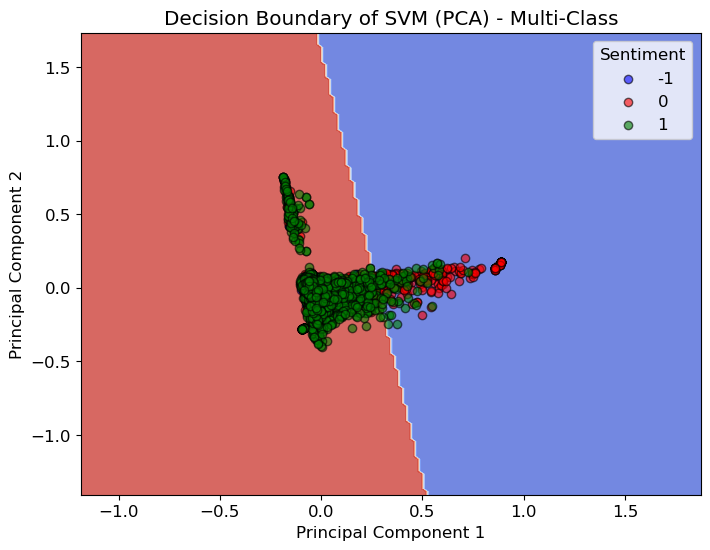

In [ ]:
# SVM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load the dataset
#data = pd.read_csv('your_dataset.csv')

# Preprocess the data and extract features using TF-IDF
X = data['text']
y = data['sentiment']
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vec.toarray())

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the SVM model
svm = SVC(kernel='linear', decision_function_shape='ovo')
svm.fit(X_train, y_train)

# Predict the sentiment labels for the validation data
y_pred_val = svm.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print('Accuracy:', accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix:')
print(cm)

# Calculate classification report
classification = classification_report(y_val, y_pred_val)
print('Classification Report:')
print(classification)

# Create a meshgrid to visualize the decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions and create a contour plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)

# Scatter plot the training data points with different colors for each class
labels = np.unique(y_train)
colors = ['blue', 'red', 'green']
for label, color in zip(labels, colors):
    indices = np.where(y_train == label)
    plt.scatter(X_train[indices, 0], X_train[indices, 1], c=color, edgecolors='k', label=str(label), alpha=0.6)

# Scatter plot the validation data points with black color
#plt.scatter(X_val[:, 0], X_val[:, 1], c='white', edgecolors='k', label='Validation')

# Add legend
plt.legend(title='Sentiment', loc='best')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of SVM (PCA) - Multi-Class')
plt.show()


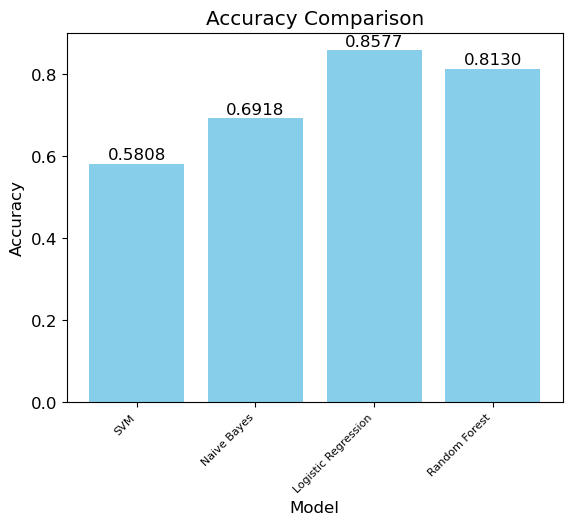

In [ ]:
svm_accuracy = 0.5808202653799759
naive_accuracy = 0.6917973462002412
log_accuracy = 0.8576598311218335
random_forest = 0.8130

# Create a bar plot
labels = ['SVM', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracies = [svm_accuracy, naive_accuracy, log_accuracy, random_forest]

plt.bar(labels, accuracies, color='skyblue')

# Set the axis labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', color='black')

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)

# Show the plot
plt.show()


# **Network Analysis**

In-degree centrality:
Node 1: 0.0
Node 2: 0.0
Node 3: 0.0
Node 4: 0.0
Node 5: 0.0
Node 6: 0.006024096385542169
Node 7: 0.006024096385542169
Node 8: 0.006024096385542169
Node 9: 0.006024096385542169
Node 10: 0.006024096385542169
Node 11: 0.006024096385542169
Node 12: 0.006024096385542169
Node 13: 0.006024096385542169
Node 14: 0.006024096385542169
Node 15: 0.0
Node 16: 0.006024096385542169
Node 17: 0.006024096385542169
Node 18: 0.006024096385542169
Node 19: 0.0
Node 20: 0.0
Node 21: 0.0
Node 22: 0.0
Node 23: 0.006024096385542169
Node 24: 0.006024096385542169
Node 25: 0.006024096385542169
Node 26: 0.006024096385542169
Node 27: 0.006024096385542169
Node 28: 0.006024096385542169
Node 29: 0.006024096385542169
Node 30: 0.006024096385542169
Node 31: 0.006024096385542169
Node 32: 0.006024096385542169
Node 33: 0.006024096385542169
Node 34: 0.006024096385542169
Node 35: 0.006024096385542169
Node 36: 0.006024096385542169
Node 37: 0.006024096385542169
Node 38: 0.006024096385542169
Node 39: 0.0
Node

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


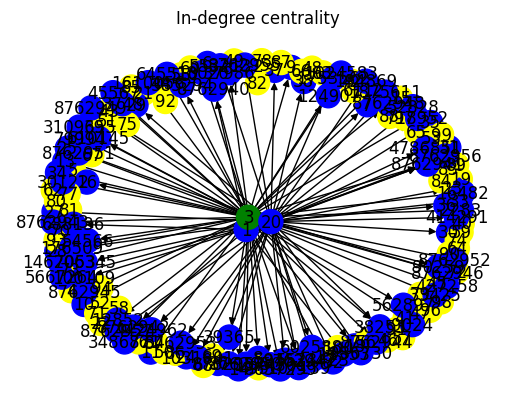

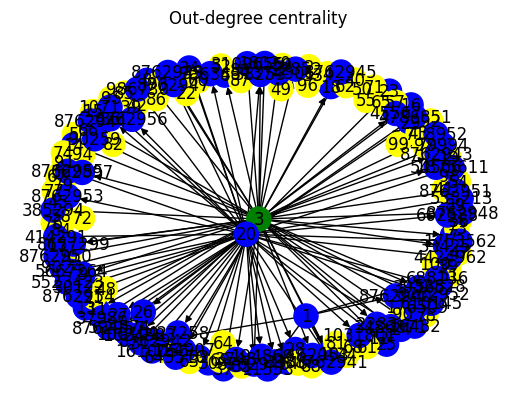

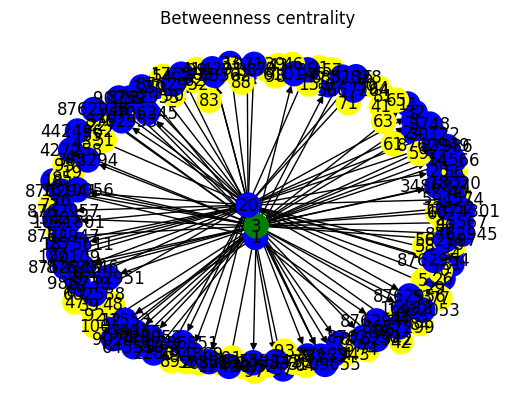

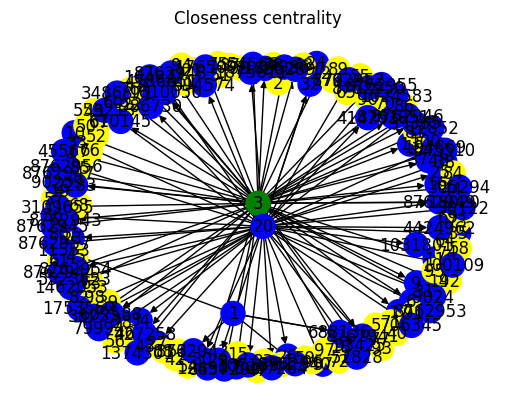

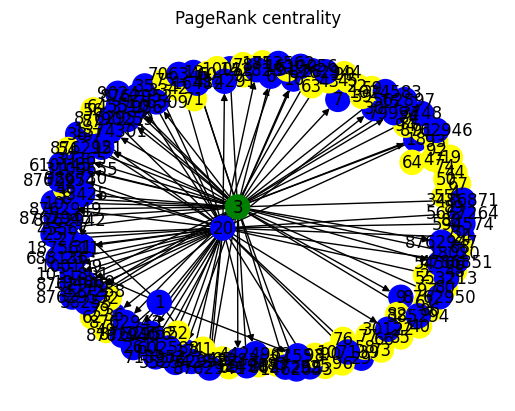

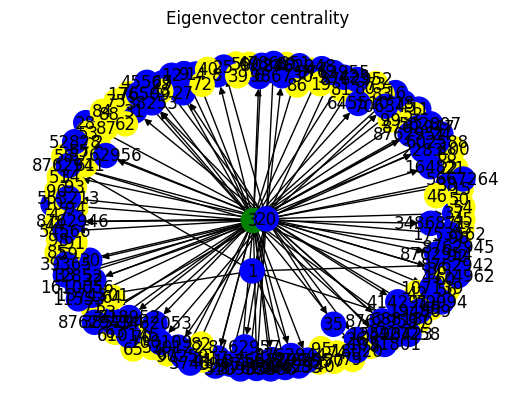

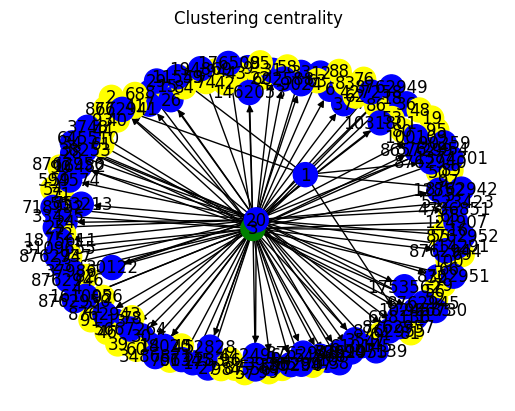

In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt

# Read nodes from nodes.csv
with open('nodes.csv', 'r') as nodes_file:
    nodes_reader = csv.reader(nodes_file)
    nodes = [row[0] for row in nodes_reader][:100]  # Limit to the first 100 nodes

# Read edges from edges.csv
with open('edges.csv', 'r') as edges_file:
    edges_reader = csv.reader(edges_file)
    edges = [(row[0], row[1]) for row in edges_reader if len(row) >= 2][:100]  # Limit to the first 100 edges

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
for node in nodes:
    graph.add_node(int(node))

# Add edges to the graph
for edge in edges:
    source = int(edge[0])
    target = int(edge[1])
    graph.add_edge(source, target)

# Calculate centrality measures
in_degree_centrality = nx.in_degree_centrality(graph)
out_degree_centrality = nx.out_degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)
pagerank_centrality = nx.pagerank(graph)
eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=500, tol=1e-6)  # Adjust parameters
clustering_centrality = nx.clustering(graph)

# Print centrality measures
print("In-degree centrality:")
for node, centrality in in_degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nOut-degree centrality:")
for node, centrality in out_degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nBetweenness centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nCloseness centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nPageRank centrality:")
for node, centrality in pagerank_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nEigenvector centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nClustering centrality:")
for node, centrality in clustering_centrality.items():
    print(f"Node {node}: {centrality}")

# Customize node colors based on degree
max_edges = max(graph.degree, key=lambda x: x[1])[1]
min_edges = min(graph.degree, key=lambda x: x[1])[1]
node_colors = ['green' if graph.degree[node] == max_edges else 'yellow' if graph.degree[node] == min_edges else 'blue' for node in graph.nodes]

# Plot the graph for each centrality measure
centrality_measures = {
    "In-degree centrality": in_degree_centrality,
    "Out-degree centrality": out_degree_centrality,
    "Betweenness centrality": betweenness_centrality,
    "Closeness centrality": closeness_centrality,
    "PageRank centrality": pagerank_centrality,
    "Eigenvector centrality": eigenvector_centrality,
    "Clustering centrality": clustering_centrality
}

for centrality_name, centrality in centrality_measures.items():
    plt.figure()
    plt.title(centrality_name)
    nx.draw(graph, pos=nx.spring_layout(graph), node_color=node_colors, cmap="coolwarm", with_labels=True)
    plt.show()
